In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from pathlib import Path
from social_dynamics import autoencoder_utils
import utils

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

root_path = utils.determine_root_path()

In [2]:
autoencoder_clustering_path = root_path.joinpath("large_autoencoder_clustering-1")
autoencoder_results_path = autoencoder_clustering_path.joinpath("autoencoders_results")
model_input_types = ["cnn-complete", "cnn-cut", "dnn-complete", "dnn-cut"]

results = utils.load_autoencoder_exploration_results(path=autoencoder_clustering_path,
                                                     model_input_types=model_input_types)

# MSE Distribution over models

In [ ]:
plt.figure(figsize=(15, 15))
for i, model_input_type in enumerate(model_input_types):
    plt.subplot(4, 1, i+1)
    plt.hist(results[results["Model-Input Type"] == model_input_type]["MSE"], bins=50)
    plt.xlim(0, 12)
    plt.xlabel('MSE')
    plt.ylabel('Frequency')
    plt.title(model_input_type)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
for i, model_input_type in enumerate(model_input_types):
    plt.subplot(4, 1, i+1)
    mse_results = results[results["Model-Input Type"] == model_input_type]["MSE"].values
    n_params_dist = results[results["Model-Input Type"] == model_input_type]["N. Params"].values
    plt.scatter(n_params_dist, mse_results, s=2)
    best_model_index = np.argmin(mse_results)
    plt.scatter(n_params_dist[best_model_index], mse_results[best_model_index], s=20, c='red', label='Best Performer')
    plt.xlabel('Number of parameters')
    plt.ylabel('MSE Score')
    plt.xscale('log')
    plt.xlim(2*10**5, 1.5*10**9)
    plt.title(model_input_type + f'      Best model: {best_model_index}')
    plt.legend()

plt.tight_layout()
plt.show()

# Sample Autoencoder MSE distribution

In [ ]:
model_path = autoencoder_results_path.joinpath(
    utils.select_autoencoder_model(model_input_type='any', results=results, mode='mse', start=6, end=7))

plt.figure(figsize=(20, 8))
plt.hist(np.load(model_path.joinpath('mses.npy')), bins=200)
plt.title(model_path.name)
plt.show()

# Sample Autoencoder predictions

In [3]:
series_dir_path = Path("/home/htc/fmalerba/experiments_results/2_opt-h_luzie-alpha_beta_gamma_delta_expl-0.0001t")
datasets, n_agents, n_options = autoencoder_utils.load_all_datasets(series_dir=series_dir_path,
                                                                    downsampling=4)
y_trues = dict([(key, np.array(list(datasets[key].as_numpy_iterator()))[:, 1])
                for key in datasets])
del datasets

[13720 14052  9644  9249  7213] (5,)


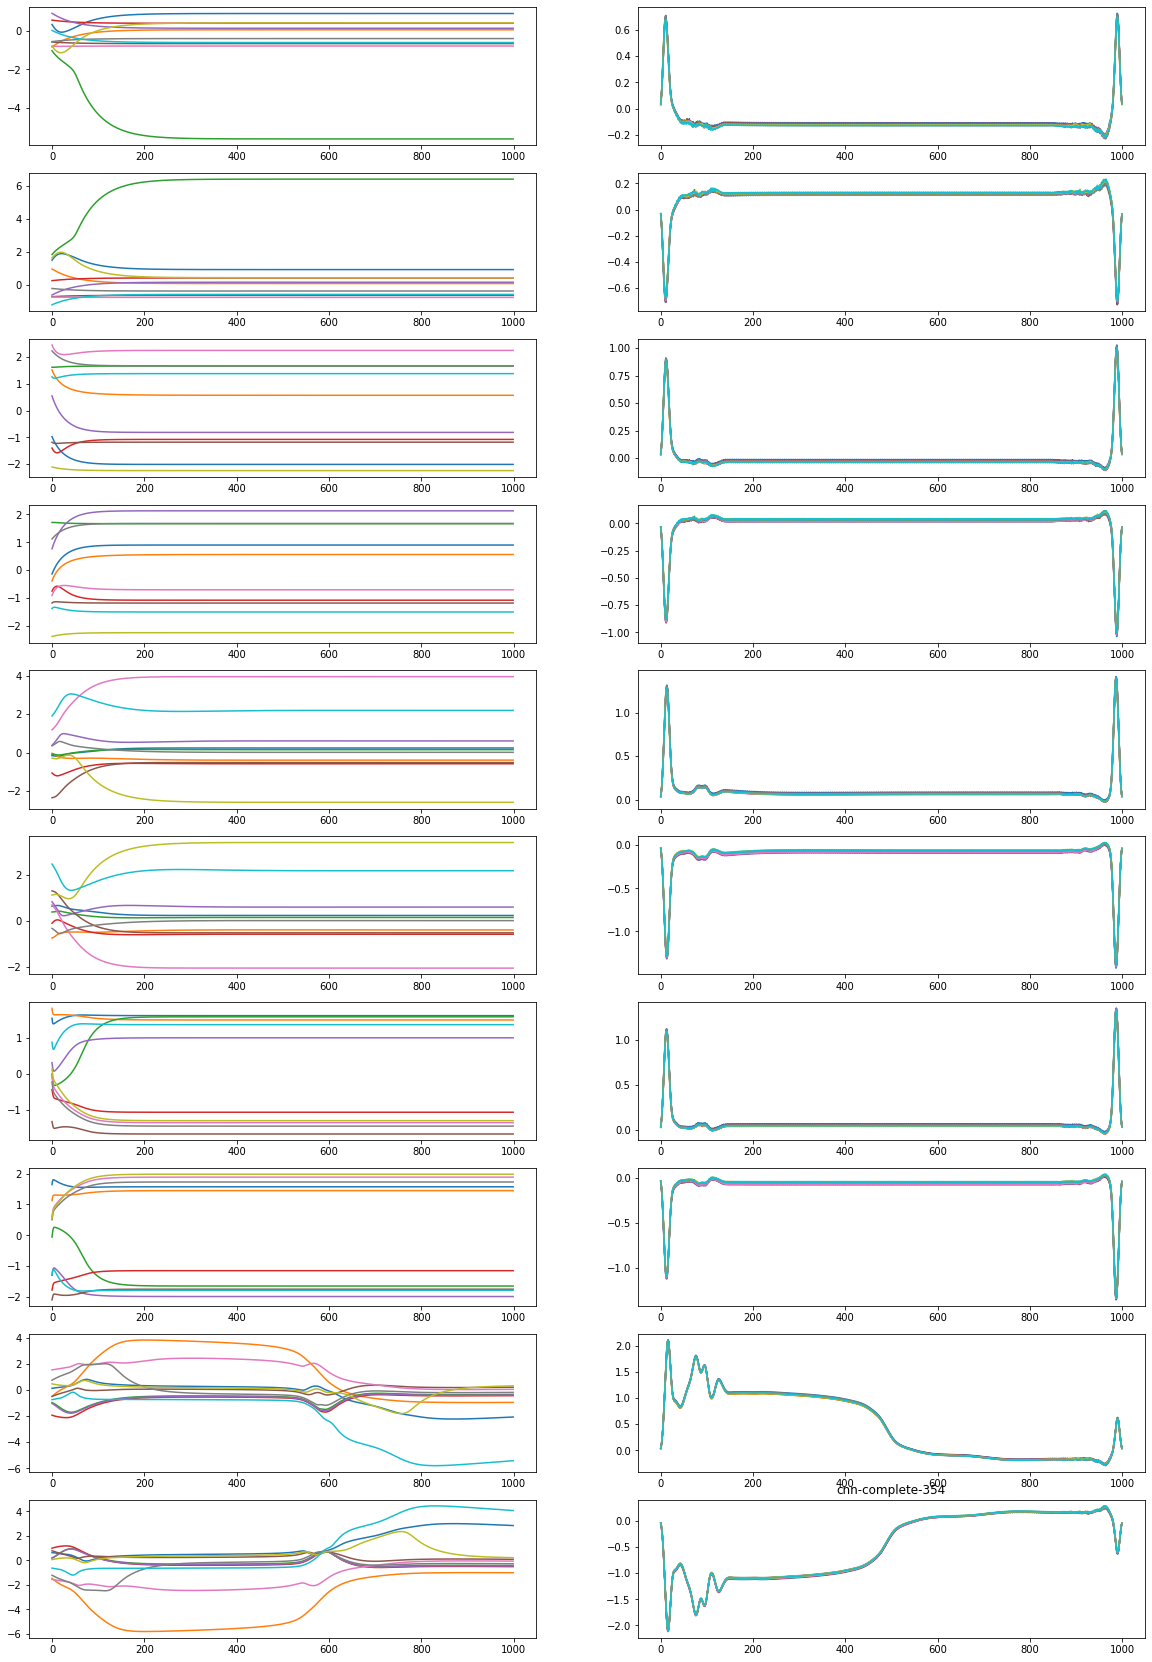

In [4]:
model_path = autoencoder_results_path.joinpath(
    utils.select_autoencoder_model(model_input_type='any', results=results, mode='mse', start=6, end=7))
#model_path = autoencoder_results_path.joinpath("cnn-complete-72")

model_input_type = "-".join(model_path.name.split('-')[:2])

trues, preds = utils.select_predictions(model_path=model_path, mode='mse', n_to_sample=5, y_true=y_trues[model_input_type],
                                        n_agents=n_agents, n_options=n_options, start=2, end=4)

plt.figure(num=1, figsize=(20, 30))
autoencoder_utils.plot_preds(fig_num=1,
                             y_true=trues,
                             y_pred=preds,
                             n_agents=n_agents,
                             n_options=n_options)
plt.title(model_path.name)
plt.show()

# Best Models predictions

In [ ]:
best_results_models = [(model_input_type, np.argmin(results[results['Model-Input Type'] == model_input_type]))
                       for model_input_type in ['cnn-complete', 'cnn-cut', 'dnn-complete', 'dnn-cut']]

plt.figure(figsize=(40, 60), dpi=150)
for i, (model_input_type, ind) in enumerate(best_results_models):
    model_name = model_input_type + '-' + str(ind)
    model_path = autoencoder_results_path.joinpath()
    plt.subplot(1, 4, i + 1)
    plt.imshow(mpimg.imread(autoencoder_results_path.joinpath(model_name, 'worst_predictions.png')))
    plt.title(model_name)
    plt.axis('off')

plt.show()

# Autoencoder n_params distribution

In [ ]:
plt.figure(figsize=(15, 15))
for i, model_input_type in enumerate(model_input_types):
    plt.subplot(4, 1, i+1)
    n_params_dist = results[results["Model-Input Type"] == model_input_type]["N. Params"].values
    plt.hist(n_params_dist, bins=50)
    plt.xscale("log")
    plt.title("{} --- n_models: {} --- mean: {}".format(model_input_type, n_params_dist.shape[0], format(np.mean(n_params_dist), "3.2e")))
plt.show()